In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from cp_utils.cp_dir_file_ops import define_env
from cp_utils.create_img_from_chars import *

import imgaug
from imgaug import BoundingBox, BoundingBoxesOnImage

In [2]:
env = define_env()
if env == 'PC':
    train_dir_fp = 'C:\\Users\\Art\\PycharmProjects\\Course1\\yymnist\\mnist\\train'
elif env == 'SERVER':
    train_dir_fp = '/home/neo/PycharmProjects/Course1/yymnist/mnist/train'
else:
    raise NotImplementedError('Paths are not specified')

train_imgs_list = os.listdir(train_dir_fp)

Computed once


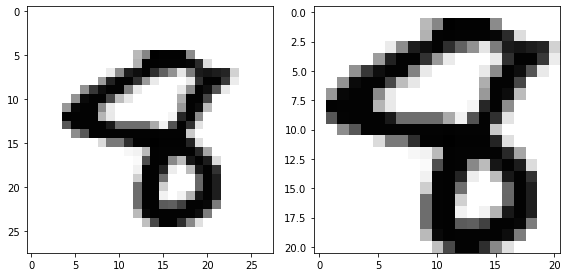

In [3]:
palette = get_palette_np()
min_max_ratios = [2, 5]

img_sp = np.random.choice(train_imgs_list)
img_fp = os.path.join(train_dir_fp, img_sp)
img = plt.imread(img_fp)
img_cut = cut_char_img(img)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_cut, cmap='gray')
plt.tight_layout()
plt.show()

### Define appropriate values, add a color

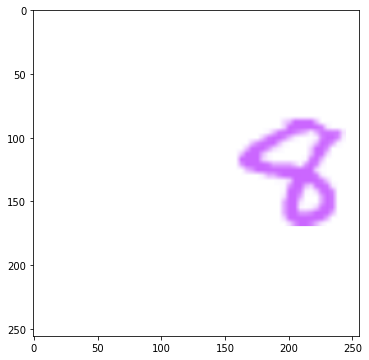

In [4]:
new_img = np.ones(shape=(256, 256, 3), dtype=np.uint8) * 255
img_cut_res = resize_char_img(img_cut, min_max_ratios)

new_img, bboxes, colors = paste_colored_char_img(new_img, img_cut_res,
                                                 bboxes=[], colors=[])
bbox = bboxes[0]
# Show a big picture
plt.figure(figsize=(6, 6))
plt.imshow(new_img)
plt.show()

### Draw a bounding box

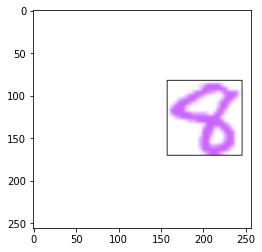

In [5]:
ia_bbox = BoundingBox(y1=bbox[0], x1=bbox[1], y2=bbox[2], x2=bbox[3])
ia_bboxes = BoundingBoxesOnImage([ia_bbox], shape=new_img.shape)
new_img_wi_bbs = ia_bboxes.draw_on_image(new_img, color=(0, 0, 0))
plt.imshow(new_img_wi_bbs)
plt.show()

### Draw a segmentation mask

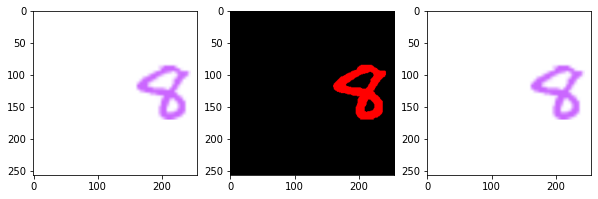

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
arr = get_char_mask_by_color(new_img, bboxes[0], colors[0])
ax[0].imshow(new_img, cmap='gray')
color_mask_int = (255, 0, 0)
overlay = np.dstack([arr, arr, arr]) * color_mask_int
ax[1].imshow(overlay, cmap='gray')
new_img_wi_seg_map = np.array(new_img + overlay).astype(np.uint8)
ax[2].imshow(new_img_wi_seg_map)
plt.show()

### Try segmentation maps in img

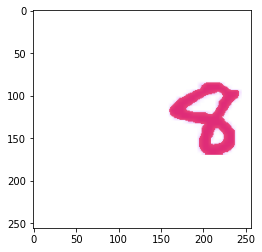

In [7]:
from imgaug import SegmentationMapsOnImage
arr = get_char_mask_by_color(new_img, bboxes[0], colors[0])
segmap = SegmentationMapsOnImage(arr=arr, shape=new_img.shape)
new_img_wi_seg_map_imgaug = segmap.draw_on_image(new_img, alpha=0.75)[0]
plt.imshow(new_img_wi_seg_map_imgaug)
plt.show()

### Check if another figure will interfere too much

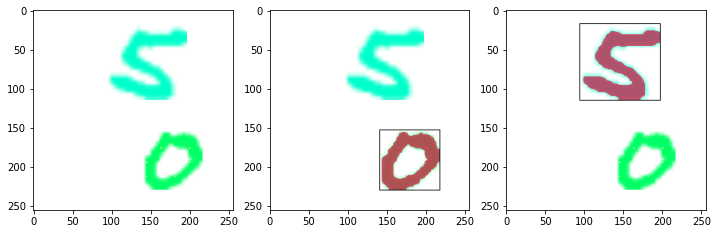

In [8]:
img_sp = np.random.choice(train_imgs_list)
img_fp = os.path.join(train_dir_fp, img_sp)
img = plt.imread(img_fp)
img_cut1 = cut_char_img(img)

img_sp = np.random.choice(train_imgs_list)
img_fp = os.path.join(train_dir_fp, img_sp)
img = plt.imread(img_fp)
img_cut2 = cut_char_img(img)

new_img = np.ones(shape=(256, 256, 3), dtype=np.uint8) * 255
img_cut_res1 = resize_char_img(img_cut1, min_max_ratios)
img_cut_res2 = resize_char_img(img_cut2, min_max_ratios)

bboxes = []
colors = []
new_img, bboxes, colors = paste_colored_char_img(new_img, img_cut_res1, bboxes, colors)
new_img, bboxes, colors = paste_colored_char_img(new_img, img_cut_res2, bboxes, colors)

ia0 = BoundingBox(y1=bboxes[0][0], x1=bboxes[0][1], y2=bboxes[0][2], x2=bboxes[0][3])
ia0 = BoundingBoxesOnImage([ia0], shape=new_img.shape)

ia1 = BoundingBox(y1=bboxes[1][0], x1=bboxes[1][1], y2=bboxes[1][2], x2=bboxes[1][3])
ia1 = BoundingBoxesOnImage([ia1], shape=new_img.shape)

new_img_ia0 = ia0.draw_on_image(new_img, color=(0, 0, 0))
new_img_ia1 = ia1.draw_on_image(new_img, color=(0, 0, 0))

arr0 = get_char_mask_by_color(new_img, bboxes[0], colors[0])
arr1 = get_char_mask_by_color(new_img, bboxes[1], colors[1])

segmap0 = SegmentationMapsOnImage(arr=arr0, shape=new_img.shape)
segmap1 = SegmentationMapsOnImage(arr=arr1, shape=new_img.shape)

new_img_ia0 = segmap0.draw_on_image(new_img_ia0, alpha=0.75)[0]
new_img_ia1 = segmap1.draw_on_image(new_img_ia1, alpha=0.75)[0]

fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].imshow(new_img)
ax[1].imshow(new_img_ia0)
ax[2].imshow(new_img_ia1)
plt.tight_layout()
plt.show()

In [9]:
exit()